In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame(np.random.randint(0, 11, size=(1000000, 5)), columns=('a','b','c','d','e'))
df

,a,b,c,d,e
0,3,6,9,5,9
1,8,7,2,2,7
2,1,1,2,7,7
3,4,10,9,7,4
4,3,7,3,1,9
...,...,...,...,...,...
999995,1,1,4,8,2
999996,6,3,4,2,1
999997,1,5,9,1,10
999998,0,2,1,1,2


In [6]:
def func(a,b,c,d,e):
    if e == 10:
        return c*d
#     elif (e < 10) and (e>=5):
#         return c+d
#     elif e < 5:
#         return a+b

In [7]:
df['new'] = df.apply(lambda x: func(x['a'], x['b'], x['c'], x['d'], x['e']), axis=1)

In [8]:
df

,a,b,c,d,e,new
0,3,6,9,5,9,NaN
1,8,7,2,2,7,NaN
2,1,1,2,7,7,NaN
3,4,10,9,7,4,NaN
4,3,7,3,1,9,NaN
...,...,...,...,...,...,...
999995,1,1,4,8,2,NaN
999996,6,3,4,2,1,NaN
999997,1,5,9,1,10,9.0
999998,0,2,1,1,2,NaN


In [11]:
# Parallelize Pandas Apply with Swifter
# !pip install swifter --user


In [12]:
import swifter
df['new'] = df.swifter.apply(lambda x : func(x['a'],x['b'],x['c'],x['d'],x['e']),axis=1)

Pandas Apply:   0%|          | 0/1000000 [00:00<?, ?it/s]

## Pandas Vectorization

The fastest way to work with Pandas and Numpy is to vectorize your functions
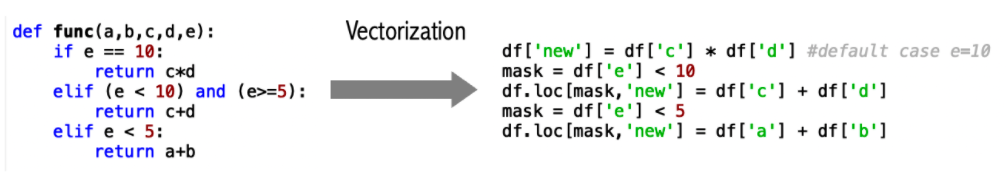

In [13]:
df['new'] = df['c'] * df['d'] #default case e = =10
mask = df['e'] < 10
df.loc[mask,'new'] = df['c'] + df['d']
mask = df['e'] < 5
df.loc[mask,'new'] = df['a'] + df['b']

###  Lighter Pandas DataFrames
You can speed up the execution even faster by using another trick: making your pandas' dataframes lighter by using more efficent data types.
As we know that df only contains integers from 1 to 10, we can then reduce the data type from 64 bits to 16 bits.

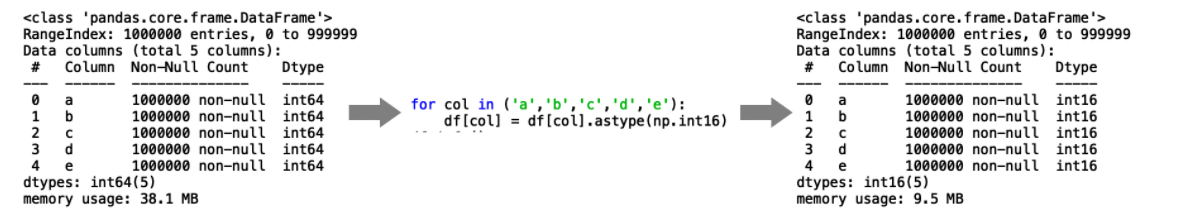

In [14]:
for col in ('a','b','c','d'):
    df[col] = df[col].astype(np.int16)

### NumPy Vectorization
The code above is relying on pandas Series to perform checks and computation. Pandas’ Series are composed of NumPy Array (to store data) plus some overhead info (such as the Series index and name).

In [ ]:
df = pd.DataFrame(np.random.randint(0, 11, size=(100000000, 5), dtype=np.int16), columns=('a','b','c','d','e'))

In [ ]:
df['new'] = df[['a','b','c','d']].sum(axis=1) * df['e']

In [ ]:
df[‘new’] = df[[‘a’,’b’,’c’,’d’]].values.sum(axis=1) * df[‘e’].values

NumPy Arrays can speed up the execution time further on massive datasets

## Conclusion
We showed that by using pandas vectorization together with efficient data types, we could reduce the running time of the apply function by 600 (without using anything else than pandas).
* Apply: 11.8 seconds
* Apply + Swifter: 6.71 seconds
* Pandas vectorizatoin: 0.035 seconds
* Pandas vectorization + data types: 0.019 seconds